In [117]:
import numpy as np

In [118]:
X= np.array(([0,0,0],
             [0,0,1],
             [0,1,0],
             [0,1,1],
             [1,0,0],
             [1,0,1],
             [1,1,0],
             [1,1,1]), dtype = float)
y= np.array(([0],
             [1],
             [1],
             [0],
             [1],
             [0],
             [0],
             [1]), dtype = float)

In [119]:
print (X)

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [120]:
print (y)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]


In [121]:
lr = 0.5
w0 = np.random.randn(X.shape[1],4)
w1 = np.random.randn(4,1)
output = np.zeros(y.shape)
Z0,z1,a0,a1,a2,error = [],[],[],[],[],[]

In [122]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

def sigmoid_derivate(p):
    return sigmoid(p) * sigmoid(1-p)
    

In [123]:
#Nos proporciona los datos de la capa anterior a la siguiente
def feedforward(X_input):
    #np.dot regresa el producto punto de dos arreglos
    global a0,z0,a1,z1,a2
    a0 = X_input # entrada de datos, no aumenta o decrementa los pesos
    z0 = np.dot(a0,w0) # guarda el acumulado
    a1 = sigmoid(z0) # Formula de activacion de la capa
    z1 = np.dot(a1,w1)
    a2 = sigmoid(z1)
    output = a2
    return output
    

In [124]:
def backprop():
        
    #Aplicando la regla de la cadena para la funcion de perdida a los pesos 2 y 1
    # T devuelve la matriz traspuesta
    global w0,w1,w2,b0,b1,b2
    mse = np.sum((y - output)**2)
    error.append(mse)
    delta1 = -(y - output) * sigmoid_derivate(z1)
    d_w1 =np.dot(a1.T,delta1)
    d_b1 = delta1

    delta0 = np.dot(delta1,w1.T)* sigmoid_derivate(z0)
    d_w0 = np.dot(a0.T, delta0)
    d_b0 = delta0

    w1= w1 -lr * d_w1
    w0= w0 -lr * d_w0


In [125]:
for i in range(200):
    output = feedforward(X)
    backprop()
    if i % 10 == 0 :
        print ("Epoch: {}, mse: {}".format(i,error[-1]))
    

Epoch: 0, mse: 2.244643726482458
Epoch: 10, mse: 1.975452034687431
Epoch: 20, mse: 1.9641015379246798
Epoch: 30, mse: 1.9527136650429864
Epoch: 40, mse: 1.9387755664634165
Epoch: 50, mse: 1.9206708098384495
Epoch: 60, mse: 1.8974052791837055
Epoch: 70, mse: 1.868429426350096
Epoch: 80, mse: 1.8335723684900127
Epoch: 90, mse: 1.7930338899296947
Epoch: 100, mse: 1.7474025933104411
Epoch: 110, mse: 1.6976224915601976
Epoch: 120, mse: 1.6448362394839022
Epoch: 130, mse: 1.5901319284398507
Epoch: 140, mse: 1.5342883832264649
Epoch: 150, mse: 1.47759329504335
Epoch: 160, mse: 1.4197725355184556
Epoch: 170, mse: 1.36006157382125
Epoch: 180, mse: 1.297453152314923
Epoch: 190, mse: 1.2311351753589428


In [126]:
w0

array([[ 3.09045348,  0.3381738 ,  4.54875063, -0.07219332],
       [-0.76271849,  1.11348503,  3.87093059,  1.91943018],
       [-2.67995886, -2.1815292 , -5.95016862, -0.61430587]])

In [127]:
w1

array([[-2.38649282],
       [-1.86736127],
       [ 4.39840749],
       [-1.09890991]])

In [128]:
output = feedforward([0,0,0])
output

array([0.38291866])

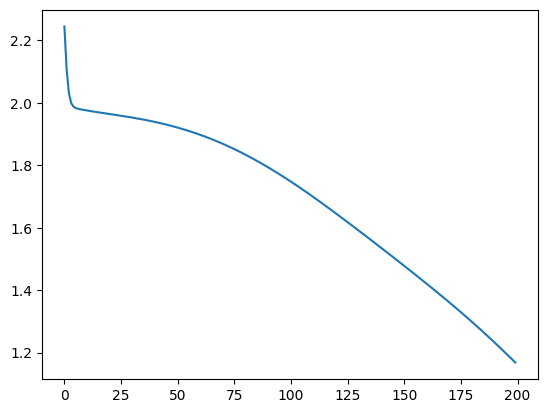

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(error)